![alt text](uspas.png)
# Fundamentals of Accelerator Physics and Technology 
### (with Simulations and Measurements Lab)
# Measuring Beam Distributions at the SNS BTF
##### Author: K. Ruisard and A. Zhukov

## We will be measuring the beam distribution at the SNS Beam Test Facility (BTF), using Zoom and screen-sharing to enable remote control over the experiment. Additionally, as part of the lab report, simulations of the BTF will be performed in OPAL using the [Sirepo](https://beta.sirepo.com) environment. Questions to be turned in for credit are in **bold** and numbered.

### Python Notes: 
- You wont need much python specific code for this lab, but here are some tips:
- Press shift+enter to execute a cell, or use the play button at the top of the window
- Make sure you exectue cells in order, or re-exectue cells if you change something at the top of the notebook.
- You can also exectue the whole notebook by using 'Run all cells' under the 'Run' tab.
----------

In [3]:
%matplotlib inline

## 1. Introduction to SNS Beam Test Facility

The Beam Test Facility (BTF) is a replica of the SNS injector. It is comprised of:

- $H^-$ ion source,
- very short low-energy beam transport (LEBT) section which focuses 65 keV, 40-60 mA beam produced by the ion source, 
- a radiofrequency quadrupole (RFQ), which accelerates from 65 keV to 2.5 MeV while simultaneously focusing the beam,
- medium energy beam transport (MEBT) at 2.5 MeV

In the SNS, the MEBT section provides room for focusing and diagnostics before entrance into the accelerating sections of the linac. 
The BTF does not perform acceleration above 2.5 MeV. Instead, the MEBT is used for diagnostics to study the beam distribution and focusing elements to enable study of beam transport at this energy.


## 2. Measuring beam profile

After the RFQ, a series of four quadrupoles are used to contain and control the transverse beam size. Each quadrupole focuses in one plane and defocuses in the other. Near the end of a linac, quadrupoles will be optimized for desired beam size on target or for matched injection into a ring. Along the linac, quadrupoles are set to maintain a well-focused beam and minimize losses during acceleration stages.  

We are going to measured a one-dimensional beam profile and compare the measured beam size to the simulation plot below:









This plot shows evolution of beam rms sizes between the RFQ exit and the first set of slits.
The location of the four quadrupoles is indicated in the drawing. Quadrupole polarity is indicated by the shape.
At the slit, the predicted beam sizes are x-rms = 3.25 mm, y-rms = 4.10 mm


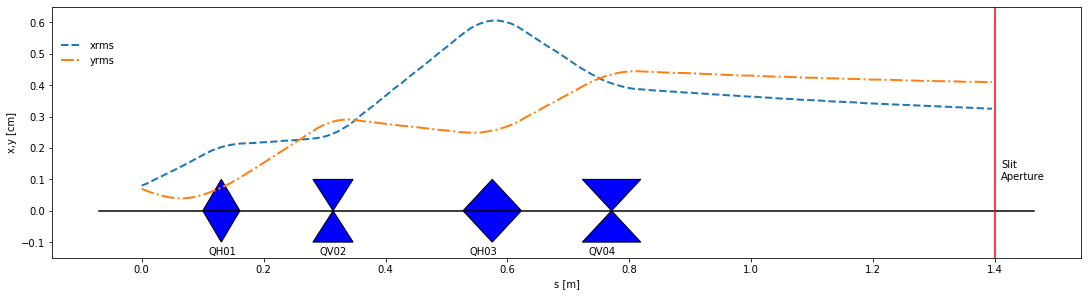

In [8]:
## Ignore this code box; This produces the plot of beam size vs s

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

print('This plot shows evolution of beam rms sizes between the RFQ exit and the first set of slits.')

filename = 'data_beam_evolution_32mA_pyorbit'
names = ['s','n','xrms','yrms','zrms','ax','bx','ex','ay','by','ey','az','bz','ez','sx','sy','sxx','syy','sxy','r90','r99']
df = pd.read_csv(filename,sep='\s+',names=names,skiprows=1)


fig,ax1 = plt.subplots(constrained_layout=True,figsize=[15,4])
ax1.plot(df['s'],df['xrms'],label='xrms',linestyle='--',linewidth=2)
ax1.plot(df['s'],df['yrms'],label='yrms',linestyle='-.',linewidth=2)
ax1.set_xlabel('s [m]')
ax1.set_ylabel('x,y [cm]')
plt.legend(loc='upper left',bbox_to_anchor=(0,1),frameon=False)
ax1.set_ylim([-.15,.65])

plt.legend(loc='upper left',bbox_to_anchor=(0,.9),frameon=False);


# -- draw lattice
from matplotlib.patches import Polygon

print('The location of the four quadrupoles is indicated in the drawing. Quadrupole polarity is indicated by the shape.')

maglist = []
maglist.append([.1306, .061, 1,  'QH01'])
maglist.append([.3139, .066, -1, 'QV02'])
maglist.append([.5751, .096, 1,  'QH03'])
maglist.append([.7709, .096, -1, 'QV04'])

def magparse(magval):
    s0 = magval[0] -.5*magval[1]
    s1 = magval[0] + .5*magval[1]
    i = magval[2]
    name = magval[3]
    return (s0,s1,i,name)

def drawmag(magval,h):
    
    if not(type(h)==list):
        h = [-h,h]
    
    s0,s1,i,name = magparse(magval)
    c = magval[0]
    m = 0.5*(h[0]+h[1])
    
    if i==1: #Positive quad
        pts = np.array([[s0,m],[c,h[1]],[s1,m],[c,h[0]]])
    elif i==-1: # negative quad
        pts = np.array([[c,m],[s0,h[1]],[s1,h[1]],[c,m],[s1,h[0]],[s0,h[0]]])
        
    plt.text(s0+.01,h[0]-.04,name,color='k')


    
    p = Polygon(pts, fc='blue',ec="black")
    ax = plt.gca()
    ax.add_patch(p)

h=[-.1,.1]; 
plt.sca(ax1)
plt.plot(plt.xlim(),[0.5*(h[0]+h[1]),0.5*(h[0]+h[1])],'k')
for mag in maglist:
    drawmag(mag,h)
    
plt.plot([1.4,1.4],plt.ylim(),'r')
plt.text(1.41,.1,'Slit\nAperture');
    

print('At the slit, the predicted beam sizes are x-rms = %.2f mm, y-rms = %.2f mm'%(10*df.xrms.iloc[-1],10*df.yrms.iloc[-1]))



We can measure the beam profile using a slit-scan technique. We insert a screen with a thin slit (0.2 mm) aperture into the path of the beam. The small fraction of beam that passes through the slit is detected on a Faraday cup. By scanning the slit position, we can measure the charge distribution of the beam in one dimension. A horizontal slit can measure vertical profile and vice versa.

There is a pair of slits (one horizontal, one vertical) downstream of the first four quadrupole magnets. Their names are VT04 (vertical) and HZ04 (horizontal).

#### A) Measure the horizontal beam profile with the vertical slit. 

**Q1) Record the full-width, half-maximum (FWHM) of the measured profile. Compare your measured values to the values of the simulation plot above.**

FWHM x = 

FWHM y = 

## 3. Measuring beam response to quadrupole strength

The beam size is a function of the focusing strength, which is a combination of quadrupole strength and density. We can measure the effect of a single quadrupole magnet by measuring the response of the beam size to changes in quadrupole strength 

We will systematically vary quadrupole strength for two of the quadrupoles, measuring the 1D profiles using the slit-scan technique. We will compare the measured beam size to predictions generated by simulation. 

#### A) Measure the horizontal profile response to changes in QV04. 

<br/>

**Q2) Record the default QV04 setpoint:**

I [Amps] =


<br/>
In the measurement GUI,
- specify QV04 as the magnet to scan
- specify VT04 as the slit to use
- Set the range to be 80% to 140% of the nominal QV04 value 
- run scan


#### B) Measure the vertical profile response to changes in QV04.

Repeat the procedure above, but with slit HZ04.

Verify after the scan is complete that QV04 is returned to default value noted above.

#### C) Measure the beam response to QH03 in the horizontal and vertical planes
Repeat the last two steps with QH03 instead of QV04. Use the range 90% to 130% of default value. 

<br/>

**Q3) Record the default QH03 setpoint:**



I [Amps] =

<br/>

**Q4) Attach the four plots generated from the four scans to your lab report**

QV04 / VT04

QV04 / HZ04 

QH03 / VT04 

QH03 / HZ04

#### D) Calculate the FWHM for the profiles in the above four scans and plot the response curves.
You will end up with four curves: 
- x-FWHM vs QV04 current, 
- y-FWHM vs QV04 current, 
- x-FWHM vs QH03 current, 
- y-FWHM vs QH03 current. 

Normalize your quadrupole currents to the default values recorded above.
This section can be completed offline. 

- hint: you can use whichever plotting program you choose. A section of python code that will produce the plots is provided at the end of this worksheet.


#### E) Compare your response measurements to simulation

We often seek to benchmark are simulations by comparing to measurements. In this way, we can verify that the simulation is representative of the behavior of the accelerator and trust its predictions, or we can identify unusual behavior in the accelerator. 

We will run a simulation of the BTF MEBT on the sirepo server to generate values to compare to our measurements. 
This section can be completed offline. 

We will use the simulation code OPAL. OPAL is a particle-in-cell code that solves for the 3D internal fields of the bunch and tracks particles through these fields as well as the fields of external elements (e.g., magnets). The 3D solver is necessary to account for space charge, which acts as an additional defocusing force due to Coulomb repulsion of the particles within the bunch.  The initial bunch for these simulations is generated by simulating the transport through the RFQ. 

Open simulation sns-btf-mebt. Copy it to your own session (there should be a prompt).
> https://www.sirepo.com/opal#/lattice/HdMZdgoF

Under the Lattice tab:
- Find "QV04" in Beamline Elements list; hover mouse over the element and then click "Edit."
- Adjust 'K1' field to be 80% of default value
- Hint: Sirepo will do math for you. Add "*0.8" to the end of the value in the box instead of calculating 80% strength yourself. 

Under the Visualization tab:
- Select "Start New Simulation."
- After simulation completes, plots will automatically be generated. 
- Find the "Beam Statistics" plot. Record the x-rms and y-rms values at the slit location.
- hint: Hover your mouse over a point to see the coordinates
- hint: The simulation ends at the slit location

Repeat the above for at least 5 points for QH03 and 5 points for QV04. Add the simulated rms values to your plot above.

<br/>

**Q5) Attach plots for the four response curves with simulated values.**

<br/>

**Q6) You should see that the agreement between simulation and measurement becomes worse for larger changes to quadrupole strength. 
Propose an explanation for why this is.**
<br/>


## 4. Measuring beam phase space distribution



Above we used one-dimensional profiles to verify the behavior of our accelerator and benchmark our simulations. 
Occasionally we would like to predict downstream evolution of a measured beam distribution (actually that is the main focus of research being done at the BTF!).
There is not enough information in the x and y profiles to accomplish this. We are missing information about the velocity distribution.

To obtain enough information for particle tracking, we can measure the beam distribution in phase space using the same slit-scan technique. This time, we will insert two slits. The first selects charge of a known position; the second selects for transverse momentum. 

We will use slits VT04 and VT06 to measure the horizontal phase space of the beam. 

In the measurement GUI,
- select VT04 and VT06
- more instructions....
- run scan

After scan is complete, 
- click "Center" to subtract center of distribution from slit positions
- click "Transform" to apply transformation to $x$ and $x'$. The plot will be updated.
- click "Calculate emittance" to report measured emittance

<br/>

**Q7) Attach the transformed phase space plot to your lab report** 


The output of the scan is the charge collected as a function of position of the VT04 and VT06 slits. We need to apply a transformation to convert slit positions to phase space variables $x$ and $x' = dx/ds$. 

<br/>

**Q8) Derive the transformation from slit positions to angle $x'$.** 
- hint: use the small angle approximation $\sin{\phi} \approx \phi$. 

<br/>





The formula for calculating emittance from the measurement is as follows: 

- Rms emittance $\epsilon_x$ is defined as $\epsilon_x = \sqrt{\left< x^2 \right>\left<x'^2 \right> - \left< x x'\right>^2}$.

- Our measurement samples from the charge density function $f(x,x')$ at a series of discrete points $\left(x_i,x'_i\right)$.

- $\left< x^m x'^n \right> = \frac{\sum_i x_i^m x'^n_i f(x_i,x'_i)}{ \sum_i f(x_i,x'_i)}$ where $(m,n) \in [(2,0),(0,2),(1,1)]$. 





**Q9) Record the calculated emittance. Typically, RFQs produce emittances around 3 mm-mrad [unnormalized]. Is your measured emittance close to expectation?**

## Optional plotting routine

This plotting routine is provided for the response data calculated in sections 3D and 3E. Feel free to use this or any other plotting routine.


To use the python routine, enter your data in the cell below in this format: imag = [val1, val2, val3, val4]

Execute the cell, then execute the next cell below to produce the plot.

In [24]:
###########################################
## Measurement
###########################################

# -- default current values
iQH03 = 100.
iQV04 = 100.

# -- current range for measurement of QH03 in Amps
imeas3 = []
# -- measured beam profile widths for QH03 in mm
xfwhm3 = []
yfwhm3 = []

# -- current range for measurement of QH04 in Amps
imeas4 = []
# -- measured beam profile widths for QH04 in mm
xfwhm4 = []
yfwhm4 = []

###########################################
## Simulation
###########################################

# -- simulated strength of QH03 as fractional 
# values (1 = QH03 default strength)
isim3 = []
# -- simulated rms widths for QH03 in mm
xrms3 = []
yrms3 = []

# -- simulated strength of QH04 as fractional 
# values (1 = QH04 default strength)
isim4 = []
# -- simulated rms widths for QH04 in mm
xrms4 = []
yrms4 = []


In [25]:
# -- normalize by default current
im3 = np.array(imeas3)/iQH03
im4 = np.array(imeas4)/iQV04

if imeas3 or isim3:
    plt.figure()
    # measured
    if xfwhm3:
        plt.plot(im3, xfwhm3, 'C0', linestyle='none',marker='o', label='meas-x')
    if yfwhm3:
        plt.plot(im3, yfwhm3, 'C1', linestyle='none',marker='s', label='meas-y')
    # simulated
    if xrms3:
        plt.plot(isim3, xrms3, '.-C0', label='model-x')
    if yrms3:
        plt.plot(isim3, yrms3, '.-C1',  label='model-y')
    plt.legend()
    plt.title('QH03 reponse curves')
    plt.xlabel('QH03 strength [arb. units]')
    plt.ylabel('beam size [mm]')


if imeas4 or isim4:
    plt.figure()
    # measured
    if xfwhm4:
        plt.plot(im4, xfwhm4, 'C0', linestyle='none',marker='o', label='meas-x')
    if yfwhm4:
        plt.plot(im4, yfwhm4, 'C1',linestyle='none',marker='s',label='meas-y')
    # simulated
    if xrms4: 
        plt.plot(isim4, xrms4, '.-C0', label='model-x')
    if yrms4:
        plt.plot(isim4, yrms4, '.-C1', label='model-y')
    plt.legend()
    plt.title('QV04 reponse curves')
    plt.xlabel('QV04 strength [arb. units]')
    plt.ylabel('beam size [mm]')